<h1><font color = 'brown' size = '6'>
<b>
1. Scale Image Pixel Data with Keras
</b>
</font>
</h1>

<h1>

<ul>
<b>
<font color = 'brown green' size = '5'>

<li>
The pixel values in images must be scaled prior to providing the images as input to a deep learning neural network model during the training or evaluation of the model.
</li><br>

<li>
Keras supports data preparation for image data via the <i>ImageDataGenerator</i> class and API.
</li><br>

</font>
</b>
</ul>
</h1>

<h1><font color = 'brown' size = '6'>
<b>
1.1 MNIST Handwritten Image Classification Dataset
</b>
</font>
</h1>

<h1>
<ul>
<b>
<font color = 'brown green' size = '5'>

<li>
Before we dive into the usage of the ImageDataGenerator class for preparing image data, we must select an image dataset on which to test the generator.
</li><br>

<li>
 The MNIST problem, is an image classification problem comprised of 70,000 images of handwritten digits.
</li><br>

<li>
 The goal of the problem is to classify a given image of a handwritten digit as an integer from 0 to 9.
</li><br>

<li>
As such, it is a multiclass image classification problem.
</li><br>

<li>
This dataset is provided as part of the Keras library and can be automatically downloaded and loaded into memory by a call to the <i>keras.datasets.mnist.load data()</i> function.
</li><br>

</font>
</b>
</ul>
</h1>

11490434/11490434 [==============================] - 2s 0us/step
Train:  (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)
Train:  0 255 33.318421449829934 78.56748998339798
Test:  0 255 33.791224489795916 79.17246322228644



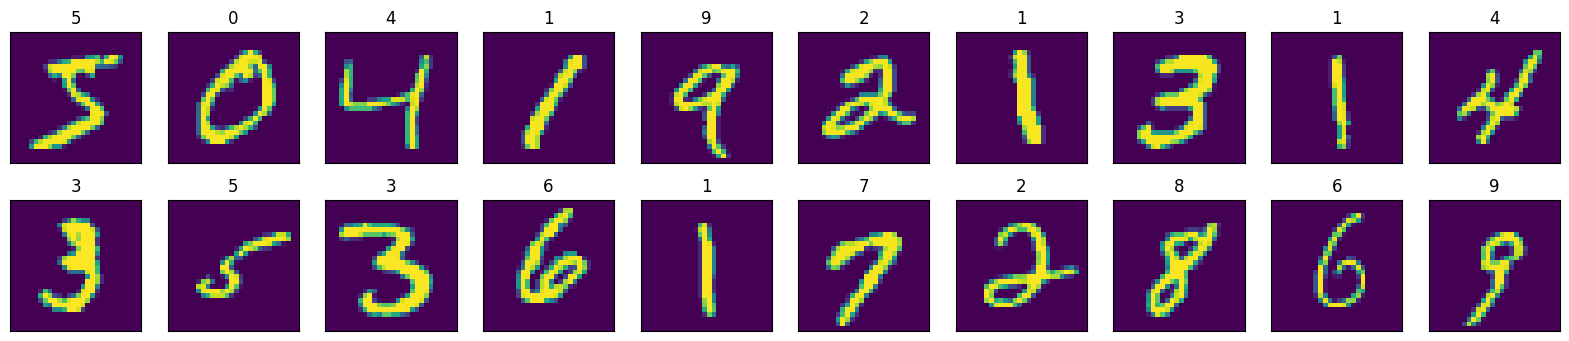

In [ ]:
# load and summarize the dataset MNIST
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# summarize the data shape
print('Train: ', train_images.shape, train_labels.shape)
print('Test: ', test_images.shape, test_labels.shape)

# summarize the pixel values
print('Train: ', train_images.min(), train_images.max(), train_images.mean(), train_images.std())
print('Test: ', test_images.min(), test_images.max(), test_images.mean(), test_images.std())
print()

# show some images of MNIST
fig = plt.figure(figsize = (20, 4))
for i in range(20):
  plt.subplot(2, 10, i+1, xticks = [], yticks = [])
  plt.imshow(train_images[i])
  plt.title(train_labels[i])

<h1><font color = 'brown' size = '6'>
<b>
1.2 ImageDataGenerator Class for Pixel Scaling
</b>
</font>
</h1>

<h1>

<ul>
<b>
<font color = 'brown green' size = '5'>

<li>
The ImageDataGenerator class in Keras provides a suite of techniques for scaling pixel values in your image dataset prior to modeling.
</li><br>

<li>
 The class will wrap your image dataset, then when requested, it will return images in batches to the algorithm during training, validation, or evaluation and apply the scaling operations just-in-time.
</li><br>

<li>
This provides an efficient and convenient approach to scaling image data when modeling with neural networks.
</li><br>

<li>
The usage of the ImageDataGenerator class is as follows.

<ol>

<li>
Load your dataset.
</li><br>

<li>
Configure the ImageDataGenerator (e.g. construct an instance).
</li><br>

<li>
Calculate image statistics (e.g. call the fit() function).
</li><br>

<li>
Use the generator to fit the model (e.g. pass the instance to the fit_ generator() function).
</li><br>

<li>
Use the generator to evaluate the model (e.g. pass the instance to the evaluate_generator() function).
</li><br>

</ol>

</li><br>

<li>
The three main types of pixel scaling techniques supported by the ImageDataGenerator class are as:

<ol>

<li>
Pixel Normalization: scale pixel values to the range 0-1.
</li><br>

<li>
Pixel Centering: scale pixel values to have a zero mean.
</li><br>

<li>
Pixel Standardization: scale pixel values to have a zero mean and unit variance.
</li>

</ol>

</li>

</font>
</b>
</ul>
</h1>

<h1><font color = 'brown' size = '6'>
<b>
1.3 Normalize Images With ImageDataGenerator
</b>
</font>
</h1>

<h1>

<ul>
<b>
<font color = 'brown green' size = '5'>

<li>
The ImageDataGenerator class can be used to rescale pixel values from the range of 0-255 to the range 0-1 preferred for neural network models.
</li><br>

<li>
Scaling data to the range of 0-1 is traditionally referred to as normalization.
</li><br>

<li>
This can be achieved by setting the rescale argument to a ratio by which each pixel can be multiplied to achieve the desired range.
</li><br>

<li>
 In this case, the ratio is 1/255 or about 0.0039.
</li>

</font>
</b>
</ul>
</h1>

In [ ]:
# example of normalizing or rescaling pixel values
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

In [ ]:
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], trainX.shape[2], channels))
testX = testX.reshape((testX.shape[0], testX.shape[1], testX.shape[2], channels))

# confirm the shape of trainX and testX
print('Shape of trainX: ', trainX.shape)
print('Shape of testX: ', testX.shape)

Shape of trainX:  (60000, 28, 28, 1)
Shape of testX:  (10000, 28, 28, 1)


In [ ]:
# confirm the scale of pixels
print('Train min = %.3f, max = %.3f' % (trainX.min(), trainX.max()))
print('Test min = %.3f, max = %.3f' % (testX.min(), testX.max()))

Train min = 0.000, max = 255.000
Test min = 0.000, max = 255.000


In [ ]:
# create generator
datagen = ImageDataGenerator(rescale = 1.0 / 255.0)

In [ ]:
# prepare a iterators to scale image
train_iterator = datagen.flow(trainX, trainY, batch_size = 64)
test_iterator = datagen.flow(testX, testY, batch_size = 64)

# confirm the scaling works
batchX, batchy = train_iterator.next()
print('Batch shape = %s, min = %.3f, max = %.3f' % (batchX.shape, batchX.min(), batchy.max()))

Batch shape = (64, 28, 28, 1), min = 0.000, max = 9.000


<h1><font color = 'brown' size = '6'>
<b>
1.4 Center Images With ImageDataGenerator
</b>
</font>
</h1>

<h1>

<ul>
<b>
<font color = 'brown green' size = '5'>

<li>
Another popular pixel scaling method is to calculate the mean pixel value across the entire training dataset, then subtract it from each image.
</li><br>

<li>
This is called centering and has the effect of centering the distribution of pixel values on zero: that is, the mean pixel value for centered images will be zero.
</li><br>

<li>
The ImageDataGenerator class refers to centering that uses the mean calculated on the training dataset as feature-wise centering.
</li><br>

<li>
It requires that the statistic is calculated on the training dataset prior to scaling.
</li>

</font>
</b>
</ul>
</h1>

In [ ]:
# example of centering a image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

In [ ]:
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))

In [ ]:
# report per image
print('Mean train = %.3f, test = %.3f' % (trainX.mean(), testX.mean()))

Mean train = 33.318, test = 33.791


In [ ]:
# create generator that centers pixels
datagen = ImageDataGenerator(featurewise_center = True)

In [ ]:
# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator Mean: %.3f' % datagen.mean)

Data Generator Mean: 33.318


<ipython-input-16-6e81348e7847>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Data Generator Mean: %.3f' % datagen.mean)


In [ ]:
# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size = 64)

In [ ]:
# get a batch
batchX, batchy = iterator.next()

In [ ]:
# mean pixel value in the batch
print(batchX.shape, batchX.mean())

(64, 28, 28, 1) -1.4996904


In [ ]:
# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size = len(trainX), shuffle = False)

In [ ]:
# get a batch
batchX, batchy = iterator.next()

In [ ]:
# mean pixel value in the batch
print(batchX.shape, batchX.mean())

(60000, 28, 28, 1) -1.9512918e-05


<h1><font color = 'brown' size = '6'>
<b>
1.5 Standardize Images With ImageDataGenerator
</b>
</font>
</h1>

<h1>

<ul>
<b>
<font color = 'brown green' size = '5'>

<li>
Standardization is a data scaling technique that assumes that the distribution of the data is Gaussian and shifts the distribution of the data to have a mean of zero and a standard deviation of one.
</li><br>

<li>
Data with this distribution is referred to as a standard Gaussian.
</li><br>

<li>
It can be beneficial when training neural networks as the dataset sums to zero and the inputs are small values in the rough range of about -3.0 to 3.0 (e.g. 99.7 of the values will fall within three standard deviations of the mean).
</li><br>

<li>
Standardization of images is achieved by subtracting the mean pixel value and dividing the result by the standard deviation of the pixel values.
</li>

</font>
</b>
</ul>
</h1>

In [ ]:
# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

In [ ]:
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))

In [ ]:
# report pixel means and standard deviations
print('Statistics train = %.3f (%.3f), test = %.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

Statistics train = 33.318 (78.567), test = 33.791 (79.172)


In [ ]:
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [ ]:
# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

Data Generator mean=33.318, std=78.567


<ipython-input-29-685cfa085230>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))


In [ ]:
# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)

In [ ]:
# get a batch
batchX, batchy = iterator.next()

In [ ]:
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

(64, 28, 28, 1) 0.025599798 1.0268577


In [ ]:
# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size = len(trainX), shuffle=False)

In [ ]:
# get a batch
batchX, batchy = iterator.next()

In [ ]:
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

(60000, 28, 28, 1) -3.4560264e-07 0.9999998
